# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [2]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")
ts = df['sales']
ts.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

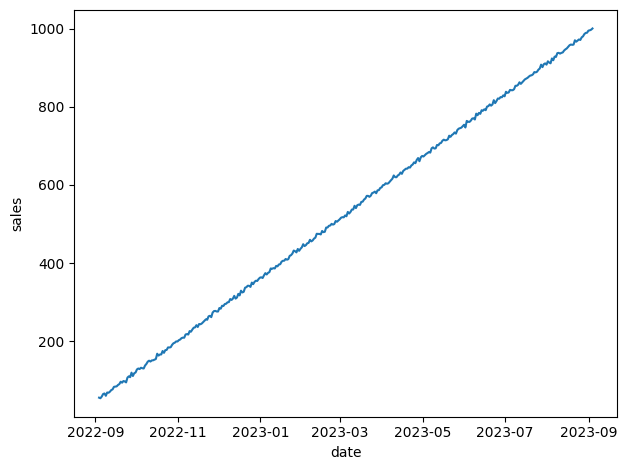

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=ts)

plt.tight_layout()
plt.show()

In [4]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

dp = seasonal_decompose(ts)
trend = dp.trend
seasonal = dp.seasonal
resid = dp.resid

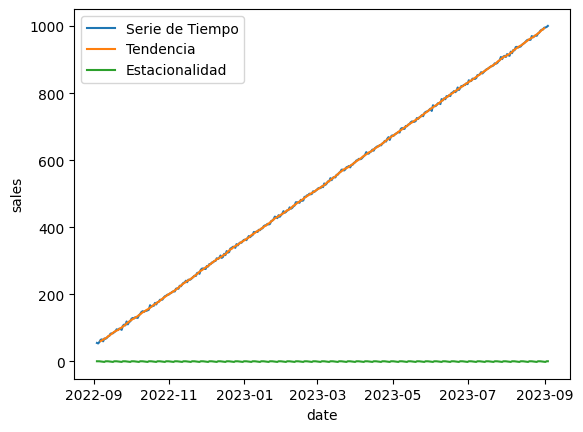

In [6]:
sns.lineplot(data = ts, label="Serie de Tiempo")
sns.lineplot(data=trend, label = "Tendencia")
sns.lineplot(data=seasonal, label = "Estacionalidad")
#sns.lineplot(data=resid)
plt.legend()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

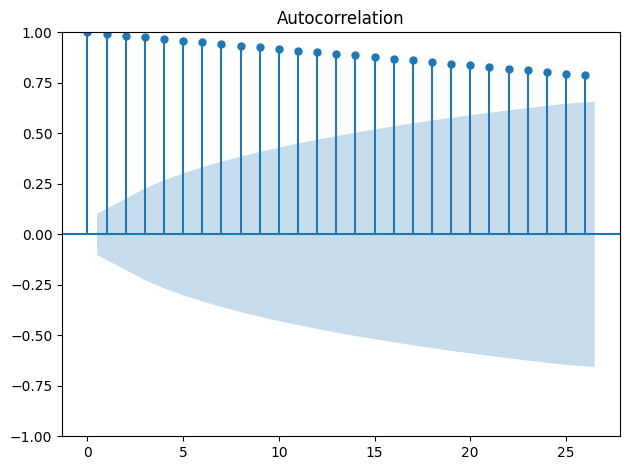

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()
plt.show()

In [20]:
!pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [21]:
from pmdarima import auto_arima

model = auto_arima(ts,seasonal=False,trace=True,m=7)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [16]:
forecast = model.predict(60)

NameError: name 'model' is not defined

In [17]:
forecast

NameError: name 'forecast' is not defined

NameError: name 'forecast' is not defined

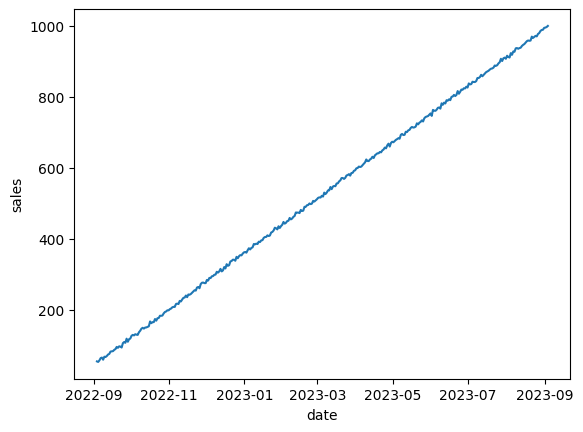

In [18]:
sns.lineplot(ts)
sns.lineplot(data=forecast,c='red')

## Conclusión

El análisis realizado permitió explorar la serie temporal y visualizar sus principales características. Se identificaron patrones relevantes y se aplicaron técnicas de procesamiento que facilitarán futuros modelos predictivos. Para continuar, se recomienda profundizar en el modelado y la validación de resultados para obtener conclusiones más robustas.